# Import Packages

In [75]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [76]:
from tensorflow import keras
from keras import datasets, layers, models
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

# Preparing Data

In [77]:
# Dowloading

(training_images, training_lablels), (testing_images, testing_labels)= datasets.cifar10.load_data()
# load_data(): returns training and testing data in this format (training_images, training_lablels), (testing_images, testing_labels)
# images are just a race of pixels


In [78]:
# scaling

# we need to scale the data from (0-255) to (0-1)
training_images, testing_images= training_images/255, testing_images/255

In [79]:
len(training_images)

50000

In [80]:
len(testing_labels)

10000

In [81]:
# setting classes names in string

classes_names=["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

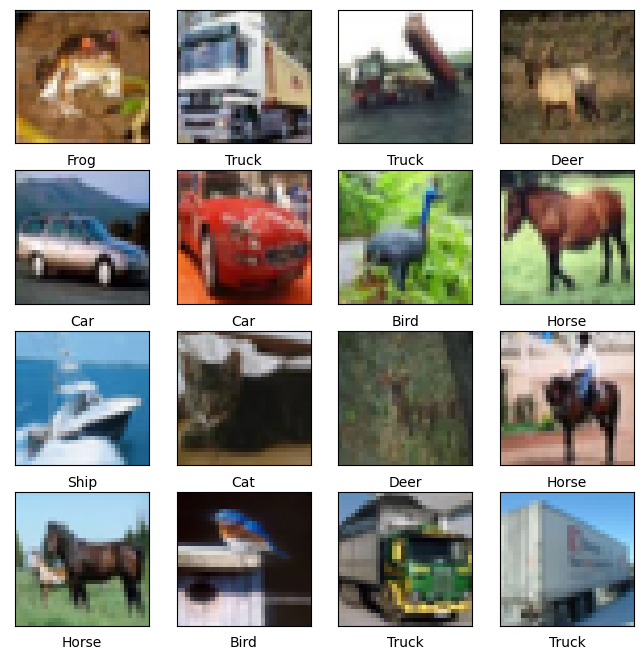

In [82]:
# plotting some images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1) # plot 4x4 grid and in each grid cell plot one image
    plt.xticks([]) # x coordinate
    plt.yticks([]) # y coordinate
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes_names[training_lablels[i][0]]) # getting the index number of the label and then getting the text form classes_names


In [83]:
# to reduce the number of emages
# training_images=training_images[:20000]
# training_lablels=training_lablels[:20000]

# testing_images=testing_images[:4000]
# testing_labels=testing_labels[:4000]

# Building the Model

#### adding layers (Conv2D, MaxPooling2D, Flatten, Dense)

In [102]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu",input_shape=(32,32,3)))
# (neurons, (filter), )

model.add(layers.MaxPooling2D((2,2)))
# every time you have a conv layer you have a max pooling 2d layer 

model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation="relu"))

model.add(layers.Flatten()) # making it in one dimension


# dense layers
model.add(layers.Dense(64, activation='relu'))

# final layer
model.add(layers.Dense(10, activation='softmax'))

#### model info

In [103]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_139 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_140 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
 flatten_23 (Flatten)        (None, 1024)            

#### optimization

In [104]:
early_stopping=EarlyStopping(monitor='val_loss', patience= 10, restore_best_weights=True, mode="min")

cpts_path='cpts/weights-improvement-{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5'
cpts1=ModelCheckpoint(filepath=cpts_path, monitor='val_accuracy' ,verbose=1, save_best_only=True, mode="max")
cpts2= ModelCheckpoint(filepath=cpts_path, monitor='val_loss' ,verbose=1, save_best_only=True, mode="min")

log_dir='logs'
tensor_board= TensorBoard(log_dir=log_dir)

csv_logger= CSVLogger(filename='my_logs.csv', separator=",", append= False)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the Model

In [99]:
gpus = tf.config.experimental.list_physical_devices('GPU')  
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)  

In [100]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [64]:
History =model.fit(training_images,training_lablels, epochs=1000, 
          validation_data=(testing_images,testing_labels), 
          callbacks=[early_stopping, cpts1, cpts2, tensor_board, csv_logger])

Epoch 1/1000
1558/1563 [============================>.] - ETA: 0s - loss: 1.5119 - accuracy: 0.4461
Epoch 1: val_accuracy improved from -inf to 0.54080, saving model to cpts\weights-improvement-01-1.29-0.54.h5

Epoch 1: val_loss improved from inf to 1.28781, saving model to cpts\weights-improvement-01-1.29-0.54.h5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5109 - accuracy: 0.4465 - val_loss: 1.2878 - val_accuracy: 0.5408
Epoch 2/1000
1561/1563 [============================>.] - ETA: 0s - loss: 1.1506 - accuracy: 0.5914
Epoch 2: val_accuracy improved from 0.54080 to 0.60000, saving model to cpts\weights-improvement-02-1.13-0.60.h5

Epoch 2: val_loss improved from 1.28781 to 1.12706, saving model to cpts\weights-improvement-02-1.13-0.60.h5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1507 - accuracy: 0.5914 - val_loss: 1.1271 - val_accuracy: 0.6000
Epoch 3/1000
1554/1563 [============================>.] - ETA: 0s - loss: 0.9890 - accuracy: 

# Plot the Performance

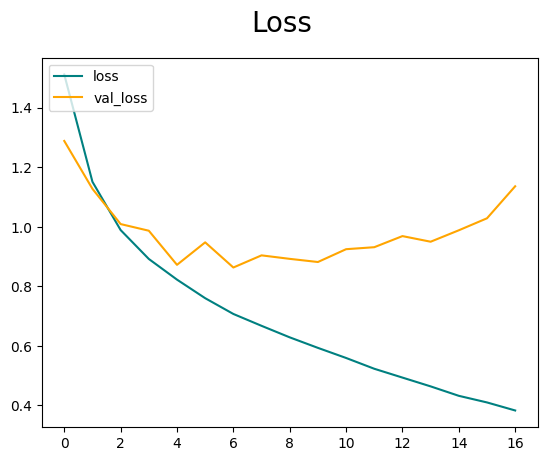

In [76]:
fig = plt.figure()
plt.plot(History.history['loss'], color='teal', label='loss')
plt.plot(History.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

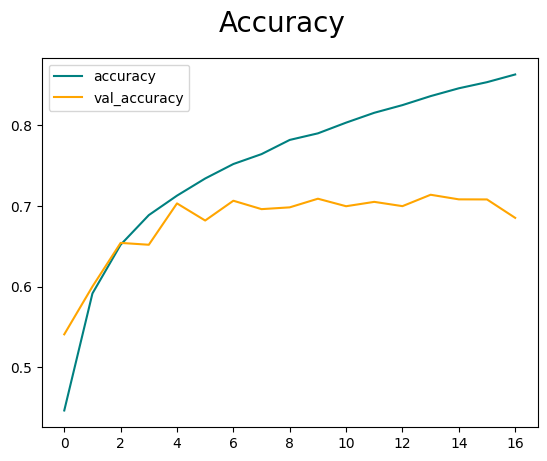

In [77]:
fig = plt.figure()
plt.plot(History.history['accuracy'], color='teal', label='accuracy')
plt.plot(History.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating

In [66]:
loss, acuracy= model.evaluate(testing_images,testing_labels)
print(f"loss: {loss}")
print(f"accuracy: {acuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.8630 - accuracy: 0.7062
loss: 0.8630045056343079
accuracy: 0.7062000036239624


# Saving the Model

In [75]:
model.save('classifier_.h5')

#### to load the model

In [57]:
model1=models.load_model('classifier_.h5')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Testing


In [67]:
# the testing image should be in the same resolution of training and validation data

img=cv.imread('horse1.jpeg') # open cv read the images as BGR so we need to convert it to RGB
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)  # converting to RGB 

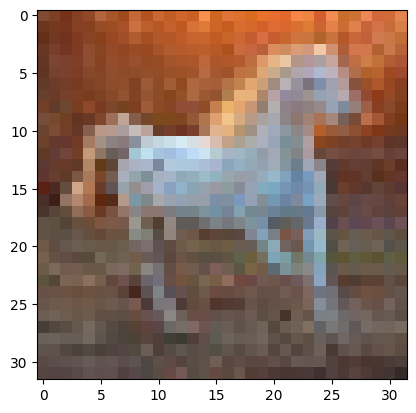

In [68]:
plt.imshow(img, cmap=plt.cm.binary)

In [69]:
predection= model.predict(np.array([img])/255 ) # this gives an array of propability of each neuron in the softmax layer

index= np.argmax(predection)  # to choose the highest propability

1/1 [==============================] - 0s 141ms/step


In [70]:
print(f'prediction is {classes_names[index]}')

prediction is Horse


#### anothe examples

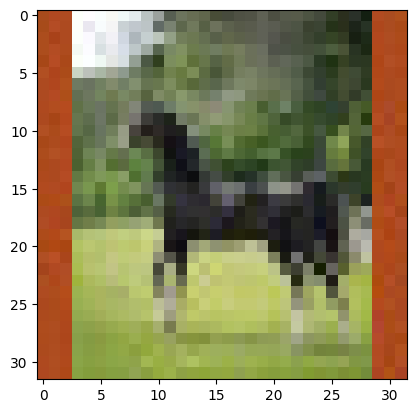

In [71]:
img=cv.imread('horse2.jpeg')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB) 
plt.imshow(img, cmap=plt.cm.binary)

In [72]:
predection= model.predict(np.array([img])/255 )
index= np.argmax(predection)
print(f'prediction is {classes_names[index]}')

1/1 [==============================] - 0s 40ms/step
prediction is Horse


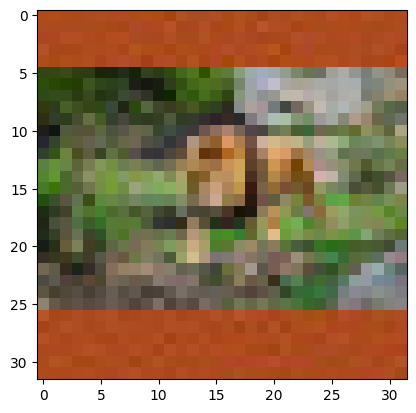

In [73]:
img=cv.imread('bigcat.jpeg')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB) 
plt.imshow(img, cmap=plt.cm.binary)


In [74]:
predection= model.predict(np.array([img])/255 )
index= np.argmax(predection)
print(f'prediction is {classes_names[index]}')

1/1 [==============================] - 0s 47ms/step
prediction is Cat
